**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [48]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
boston = pd.read_csv('Boston.csv',index_col=0)
boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
X = boston.drop(columns='medv')
y = boston.medv

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [55]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaler)

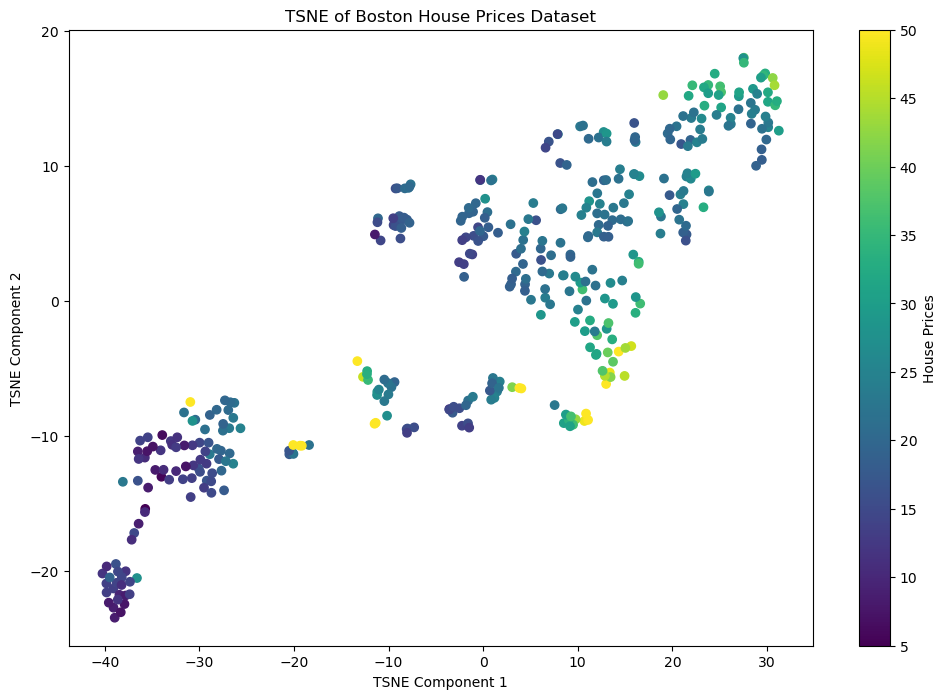

In [56]:
plt.figure(figsize=(12,8))
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=y_train,cmap="viridis")
plt.colorbar(label='House Prices')
plt.title('TSNE of Boston House Prices Dataset')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()


**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42).fit(X_train_scaler)
clusters = kmeans.predict(X_train_scaler)
# Сохранение данных в DataFrame
df_train = X_train.copy()
df_train['PRICE'] = y_train
df_train['Cluster'] = clusters  # Добавление меток кластеров в DataFrame

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaler)

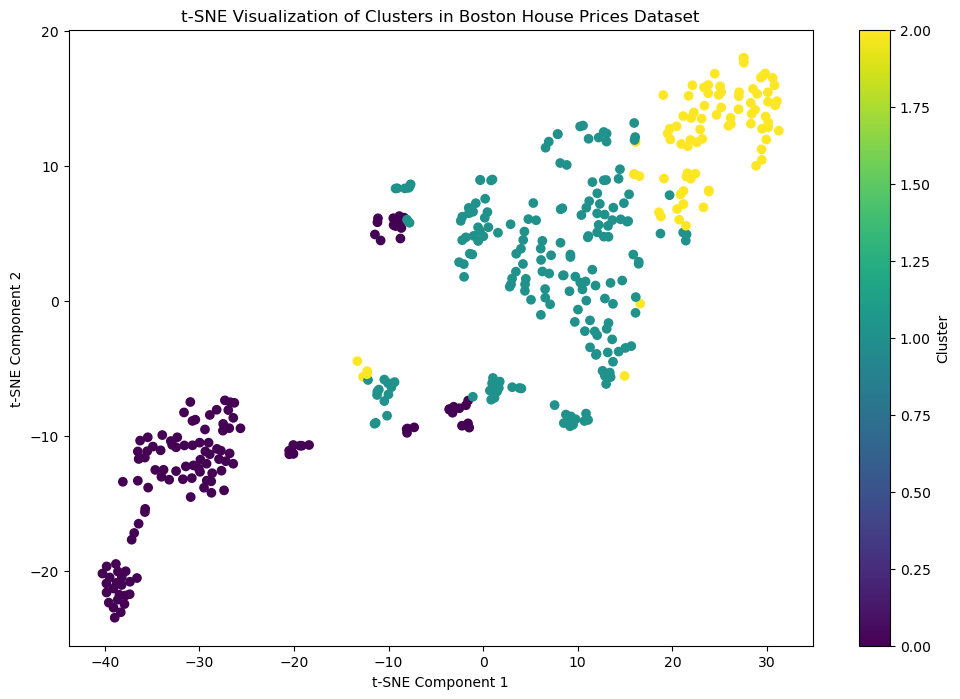

In [59]:
# Визуализация кластеров
plt.figure(figsize=(12, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('t-SNE Visualization of Clusters in Boston House Prices Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [60]:
df_train.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,PRICE,Cluster
478,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,0
16,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9,1
333,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4,2
424,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,0
20,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2,1


In [61]:
# Вычисление средних значений PRICE и CRIM для каждого кластера
cluster_means = df_train.groupby('Cluster')[['PRICE', 'crim']].mean()
print(cluster_means)

             PRICE       crim
Cluster                      
0        16.165354  10.797028
1        24.958115   0.421660
2        27.788372   0.073566


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


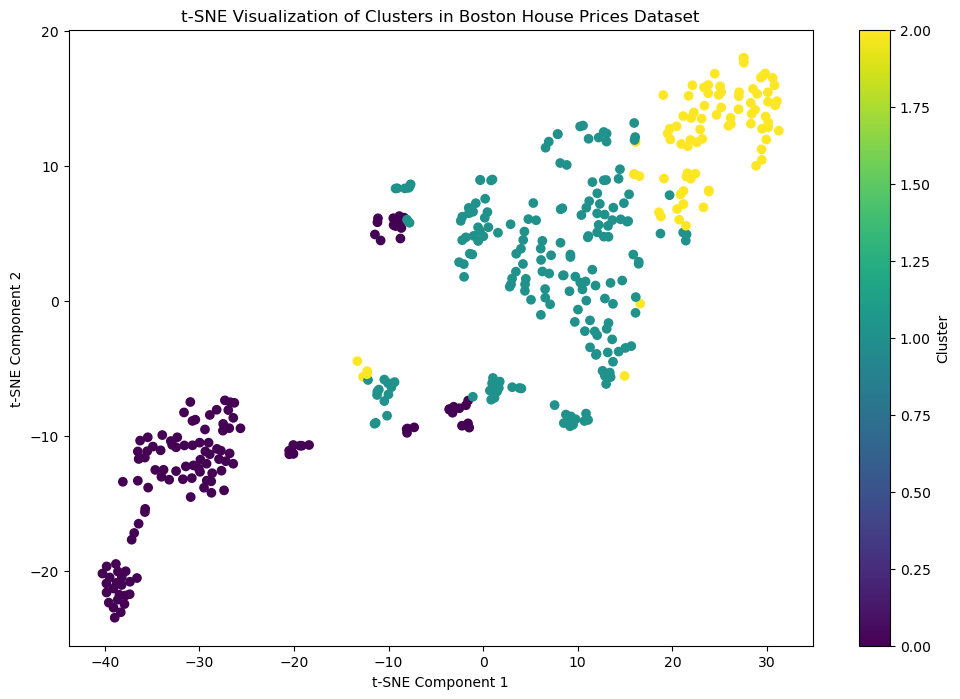

             PRICE       crim
Cluster                      
0        16.165354  10.797028
1        24.958115   0.421660
2        27.788372   0.073566


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans.fit(X_train_scaled)  # Обучение модели KMeans
clusters = kmeans.predict(X_train_scaled)  # Получение меток кластеров

# Сохранение данных в DataFrame
df_train = X_train.copy()
df_train['PRICE'] = y_train
df_train['Cluster'] = clusters  # Добавление меток кластеров в DataFrame

# Применение t-SNE для визуализации данных
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

# Визуализация кластеров
plt.figure(figsize=(12, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('t-SNE Visualization of Clusters in Boston House Prices Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Вычисление средних значений PRICE и CRIM для каждого кластера
cluster_means = df_train.groupby('Cluster')[['PRICE', 'crim']].mean()
print(cluster_means)


**Задание 3** 

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

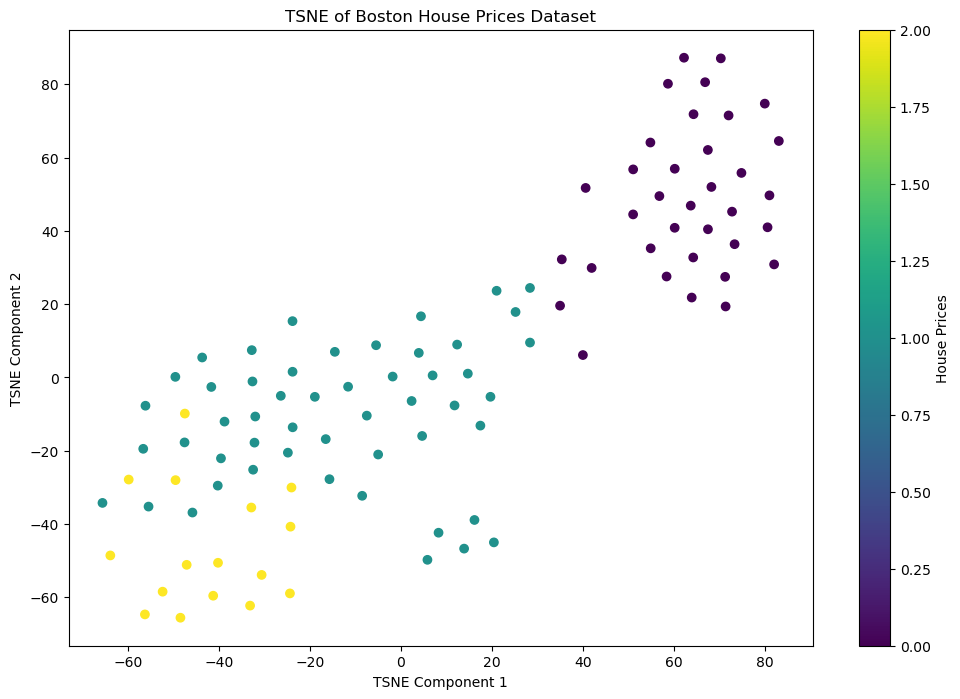

In [65]:
clusters = kmeans.predict(X_test_scaler)
# Сохранение данных в DataFrame
df_test = X_test.copy()
df_test['PRICE'] = y_test
df_test['Cluster'] = clusters  # Добавление меток кластеров в DataFrame

# Применение t-SNE для визуализации данных
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.figure(figsize=(12,8))
plt.scatter(X_test_tsne[:,0],X_test_tsne[:,1],c=clusters,cmap="viridis")
plt.colorbar(label='House Prices')
plt.title('TSNE of Boston House Prices Dataset')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

In [64]:
# Вычисление средних значений PRICE и CRIM для каждого кластера
cluster_means = df_test.groupby('Cluster')[['PRICE', 'crim']].mean()
print(cluster_means)


             PRICE       crim
Cluster                      
0        16.437143  10.165531
1        21.860784   0.266079
2        31.350000   0.062060


Из полученных результатов видно взаимосвязь средней цены от криминальной обстановки в районе, чем выше уровень "crim" тем ниже стоимость недвижимости.